# TCC Especialização em Inteligencia Artificial Aplicada - Facens 2019/2

### Nomes dos integrantes:

* Ricardo da Silva
* Osmar Prado Jr.

### Tema

* Face Anti-Spoofing Comparando arquiteturas de deep learning com tecnicas de transfer learning

### Orientador:
* Johannes

### Base de dados
Para este estudo foi utilizado 32.000 imagens com faces já pré processadas (Crop) da base de dados CelebA-Spoof Dataset.
* 25.000 Treino 
 * 12.581 live
  * 12.419 spoof
* 7.000 teste 
 * 3.500 live
  * 3.500 spoof

### Donload CelebA_Spoof_32k.zip
* https://drive.google.com/file/d/1ZocQKFCabv4xbzDutmsa0wlkJQV6_DqT/view?usp=sharing

### Github
Todos os exemplo são encontrados no repositorio publico Github:
* https://github.com/RicaJedidia/Facens_TCC_Face_Anti_Spoofing


### Referencia CelebA-Spoof Dataset 
* https://github.com/Davidzhangyuanhan/CelebA-Spoof
* https://paperswithcode.com/dataset/celeba-spoof

*O conjunto de dados CelebA-Spoof está disponível apenas para fins de pesquisa não comercial.*

### Setup Hardware
* CPU: Intel Core i7-7700 @ 3.60 Hz
* Placa de video: NVIDIA GeForge GTX 1060 6GB
* RAM: 16.0 GB
* Disco: SSD KINGSTION SA400S37120G


### Hardware
* Windows 10 x64
* Cuda 11.1
* Tensorflow:  2.1.0
* Keras:  2.2.4-tf


### Carregando bibliotecas

In [1]:
import numpy as np
import pandas as pd

import cv2
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import Xception

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

# gráfico
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Iniciando variaveis

In [2]:
LOCAL_ROOT  = 'D:/CelebA_Spoof_32k'
PATH_TEST = LOCAL_ROOT +  '/test'

BATCH_SIZE = 64
IMG_SHAPE = (224, 224, 3)
RANDOM_STATE = 42

In [3]:
path_MobileNetV2 = '../teste_01_MobileNetV2/CelebA_Spoof_32k_MobileNetV2_50.h5'
path_DenseNet121 = '../teste_02_Densenet_121/CelebA_Spoof_32k_DenseNet121_50.h5'
path_Vgg16 = '../teste_03_Vgg16/CelebA_Spoof_32k_Vgg16_50.h5'
path_Vgg19 = '../teste_04_Vgg19/CelebA_Spoof_32k_Vgg19_50.h5'
path_Xception = '../teste_05_Xception/CelebA_Spoof_32k_Xception.h5'

### Separando dados para teste

In [4]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [5]:
test_generator = test_datagen.flow_from_directory(PATH_TEST,
                                                   target_size=IMG_SHAPE[:-1],
                                                   shuffle=False,
                                                   class_mode='binary',
                                                   batch_size=BATCH_SIZE)

Found 7000 images belonging to 2 classes.


## Carregando modelos
Para manter a compatibilidade de versão será necessário mantar a arquitetura do modelo e carregar os pesos.

### Model MobileNetV2

In [6]:
mobilenet = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [7]:
model_MobileNetV2 = tf.keras.models.Sequential([mobilenet,
                                    GlobalAveragePooling2D(),
                                    Dense(512, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(128, activation = "relu"),
                                    Dropout(0.1),
                                    Dense(2, activation='softmax')
                                   ])

In [8]:
model_MobileNetV2.load_weights(path_MobileNetV2)
model_MobileNetV2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
path_MobileNetV2, path_DenseNet121


('../teste_01_MobileNetV2/CelebA_Spoof_32k_MobileNetV2_50.h5',
 '../teste_02_Densenet_121/CelebA_Spoof_32k_DenseNet121_50.h5')

### DenseNet121

In [10]:
densenet = DenseNet121(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [11]:
model_DenseNet121 = tf.keras.models.Sequential([densenet,
                                    GlobalAveragePooling2D(),
                                    Dense(512, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(128, activation = "relu"),
                                    Dropout(0.1),
                                    Dense(2, activation='softmax')
                                   ])

In [12]:
model_DenseNet121.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [13]:
model_DenseNet121.load_weights(path_DenseNet121)

### VGG16

In [14]:
vgg16 = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [15]:
model_vgg16 = tf.keras.models.Sequential([vgg16,
                                    GlobalAveragePooling2D(),
                                    Dense(512, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(128, activation = "relu"),
                                    Dropout(0.1),
                                    Dense(2, activation='softmax')
                                   ])

In [16]:
model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [17]:
model_vgg16.load_weights(path_Vgg16)

### VGG19

In [18]:
vgg19 = VGG19(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [19]:
model_vgg19 = tf.keras.models.Sequential([vgg19,
                                    GlobalAveragePooling2D(),
                                    Dense(512, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(128, activation = "relu"),
                                    Dropout(0.1),
                                    Dense(2, activation='softmax')
                                   ])

In [20]:
model_vgg19.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [21]:
model_vgg19.load_weights(path_Vgg19)

### Xception

In [22]:
xception = Xception(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [23]:
model_Xception = tf.keras.models.Sequential([xception,
                                    GlobalAveragePooling2D(),
                                    Dense(512, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(128, activation = "relu"),
                                    Dropout(0.1),
                                    Dense(2, activation='softmax')
                                   ])

In [24]:
model_Xception.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1049088   
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [25]:
model_Xception.load_weights(path_Xception)

In [26]:
models = [model_MobileNetV2, model_DenseNet121, model_vgg16,  model_vgg19, model_Xception]
names = ['MobileNetV2', 'DenseNet121', 'Vgg16', 'Vgg19', 'Xception']

In [27]:
def evaluate(models, generator, names):
    results = pd.DataFrame(columns=['accuracy', 'f1-score', 'precision'])
    
    for model, name in zip(models, names):
        print('Avaliando: {}'.format(name))
        pred = model.predict(generator, verbose=1)

        y_test = generator.classes
        y_pred = pred.argmax(axis=1)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        results.loc[name, :] = [accuracy, f1, precision]
    
    return results

In [31]:
results = evaluate(models, test_generator, names)

Avaliando: MobileNetV2
110/110 [==============================] - 15s 137ms/step
Avaliando: DenseNet121
110/110 [==============================] - 24s 223ms/step
Avaliando: Vgg16
110/110 [==============================] - 41s 369ms/step
Avaliando: Vgg19
110/110 [==============================] - 48s 433ms/step
Avaliando: Xception
110/110 [==============================] - 36s 328ms/step


In [32]:
results

,accuracy,f1-score,precision
MobileNetV2,0.917857,0.911087,0.992922
DenseNet121,0.870714,0.852774,0.990178
Vgg16,0.881857,0.869538,0.970764
Vgg19,0.906286,0.899325,0.971485
Xception,0.870429,0.851433,0.997697


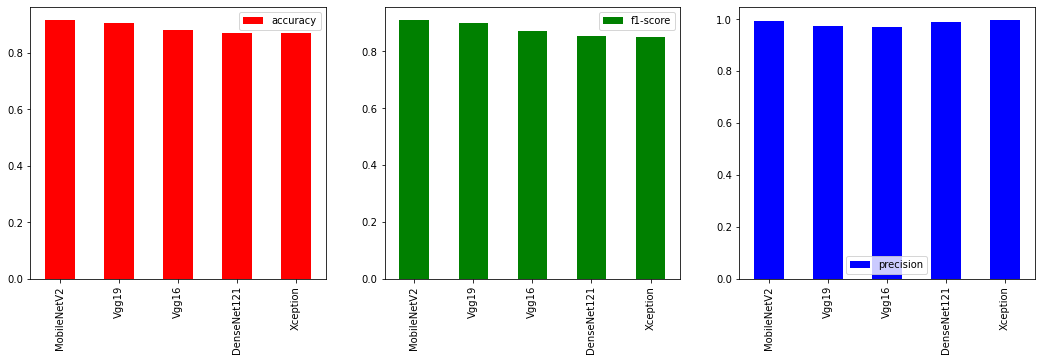

In [33]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

results.sort_values('accuracy', ascending=False).plot.bar(y='accuracy', color='r', ax=ax[0])
results.sort_values('f1-score', ascending=False).plot.bar(y='f1-score', color='g', ax=ax[1])
results.sort_values('accuracy', ascending=False).plot.bar(y='precision', color='b', ax=ax[2])

### Conclusão